# W207 Final Project: Housing Price Prediction
Authors: John Lee, Nathan Nusaputra, Ryan Sawasaki

# Abstract - Baseline

For our baseline model, we decided to use three features detailing the square footage of a home due to domain knowledge. These features are: 'GrLivArea', 'TotalBsmtSF','GarageArea'.  We determined that the linear regression model would be our baseline model since it had the highest accuracy out of the three models we tried using. We will evaluate our future performances on this baseline model.  

Key items that will continue to be discussed:  
A) What will be our evaluation function?  Accuracy with ".score" or Root-Mean-Squared-Error?
B) How are we going to standardize the model (if needed)?  StandardScaler? or another package?
C) Which machine learning model to use? Which hyperparameters to tune? Which features to use?

Steps:  
1) Importing Packages  
We imported a bunch of standard libraries (numpy, pandas, seaborn, etc..) as well as a bunch of sci-kit learn libraries for preprocessing, metrics, and models.  

2) Load and Inspect Data  
We loaded our raw data and inspected the data type and a few samples.  


3) Exploratory Data Analysis  
While exploring the data, we found that there are a lot of missing data. 33 features of the actual test data (data without class labels/sales price) had NaN data while only 19 features of the training data had NaN data. After the baseline, we intend to fill these NaN with zeros when appropriate or just drop the features.  


4) Correlations between Sales Price and Different Features  
We graphed the correlation between Sales Price with float/int type data.  We graphed a few features of object type data with Sales Price to show how we anaylzed the data. Those we find most relative to sales price will be used for our final models (not in this baseline). 


5) Baseline Models  
We determined the features that we will use for our baseline model. Did a scatter plot matrix to further dive into the data. We also did a linear model, kneighbors model, and gradient boosting model (all regressions) on these features to general a baseline model for our project.


# Abstract - Final Model

For the remainder of this notebook, several machine learning algorithms were applied to improve upon the baseline model. The steps create these additional models, feature engineer, and engineering the hyperparameters are shown in detail and described. 

Key Sections:  
1) 


# Importing Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import time
import numpy as np
import pandas as pd # to read in csv
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# SK-learn libraries for feature extraction from text.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

# Load and Inspect Data

In [2]:
#Read in data

# house price data
train_df_raw = pd.read_csv("data_raw\\train.csv") 
test_df_raw = pd.read_csv("data_raw\\test.csv")

print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)
print(train_df_raw.dtypes.value_counts())
train_df_raw.head(2)

Train Shape: (1460, 81)
Test Shape: (1459, 80)
object     43
int64      35
float64     3
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# Exploratory Data Analysis

In [3]:
train_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
test_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


**Comment**:
The describe function showed us that we should consider NaN data on many features (see below). Also, it was interesting to see the range of sales price (from 34,900 to 755,000USD) and other feature characteristics.

In [5]:
# Checking Missingness

# TRAINING DATA MISSINGNESS 
df_missing_data = train_df_raw.isnull().sum(axis=0)[train_df_raw.isnull().sum(axis=0) != 0]
# TEST DATA MISSINGNESS
df_missing_data2 = test_df_raw.isnull().sum(axis=0)[test_df_raw.isnull().sum(axis=0) != 0]

# Code to see which sample Id has missing data per feature
feature_train='MasVnrType'
print("Train Feature %s has NaN at following indices:" %feature_train, train_df_raw["Id"][train_df_raw[feature_train].isnull()].unique())
print("")
feature_test='MasVnrType'
print("Test Feature %s has NaN at following indices:" %feature_test, test_df_raw["Id"][test_df_raw[feature_test].isnull()].unique())
print("")

print("Number of train features with missing data:", len(df_missing_data))
#histograms of features with missing data
print("Number of test features with missing data:", len(df_missing_data2))


df_missing1 = pd.DataFrame(df_missing_data, columns=['train_missing_count'])
df_missing2 = pd.DataFrame(df_missing_data2,columns=['test_missing_count'])
df_missing = pd.merge(df_missing1,df_missing2, left_on=df_missing1.index, right_on=df_missing2.index, how='outer')
df_missing.columns=['feature','train_missing_count','test_missing_count']
df_missing=df_missing.sort_values(by=['test_missing_count'], ascending=False)
df_missing

Train Feature MasVnrType has NaN at following indices: [ 235  530  651  937  974  978 1244 1279]

Test Feature MasVnrType has NaN at following indices: [1692 1707 1883 1993 2005 2042 2312 2326 2341 2350 2369 2593 2611 2658
 2687 2863]

Number of train features with missing data: 19
Number of test features with missing data: 33


,feature,train_missing_count,test_missing_count
16,PoolQC,1453.0,1456.0
18,MiscFeature,1406.0,1408.0
1,Alley,1369.0,1352.0
17,Fence,1179.0,1169.0
10,FireplaceQu,690.0,730.0
0,LotFrontage,259.0,227.0
12,GarageYrBlt,81.0,78.0
13,GarageFinish,81.0,78.0
14,GarageQual,81.0,78.0
15,GarageCond,81.0,78.0


**Comment**:  
We found many features with NaN data. We intend to fill these NaN data with our domain knowledge (i.e. for those missing "LotFrontage" for size of front lot data, we would just show 0's instead of NaN).  Otherwise, we will drop the feature themselves (i.e. "PoolQC" for Pool Quality).

In [6]:
# Check for Duplicates?
print("Duplicates in Train Data:",sum(train_df_raw.duplicated()))
print("Duplicates in Test Data:",sum(test_df_raw.duplicated()))

Duplicates in Train Data: 0
Duplicates in Test Data: 0


**Comment**:  
There are no duplicated data.

# Checking Correlations between Sales Price and Other Features

In [7]:
##Number of each Type of data:
# print(train_df_raw.dtypes[(train_df_raw.dtypes != 'float') & (train_df_raw.dtypes !='int64')])
print("Float: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'float')]))
print("Int: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'int64')]))
print("Object: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')]))

Float: 3
Int: 35
Object: 43


**Comment**:  
Since the data type range from Float, Int, to Object, we must show correlation differently.  Float and Int type data can be shown with a correlation graph.  Object type data can be shown with boxplot or lmplot.
    

Float & Int Features: 37


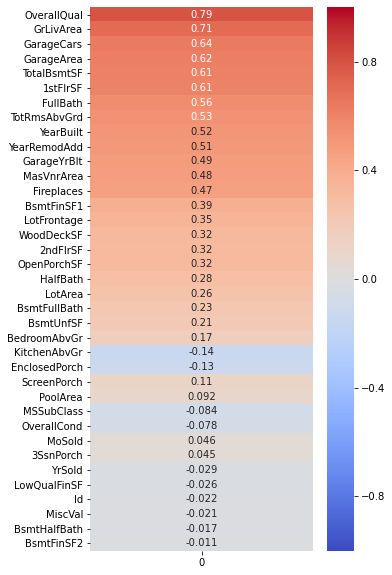

In [8]:
#Correlations between Sales Price & Int/Float Features
correlations = train_df_raw.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

**Comment**:  
We can see that OverallQual, GrLivArea, GarageCars are the top 3 most correlated features to Sales Price.  

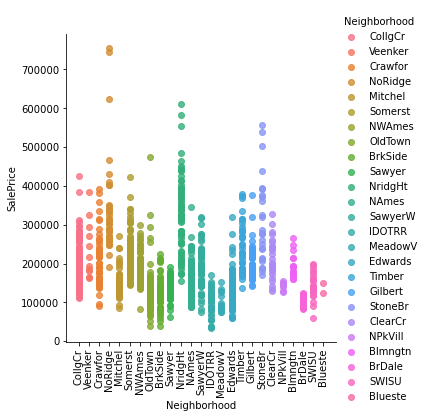

In [9]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: Neighborhood

neighborhood_df = train_df_raw[['Neighborhood','SalePrice']]
neigh_plot = sns.lmplot('Neighborhood', 'SalePrice', data=neighborhood_df, hue='Neighborhood', fit_reg=False)
neigh_plot.set_xticklabels(rotation=90)

**Comment**:  
We see that for certain neighborhoods, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

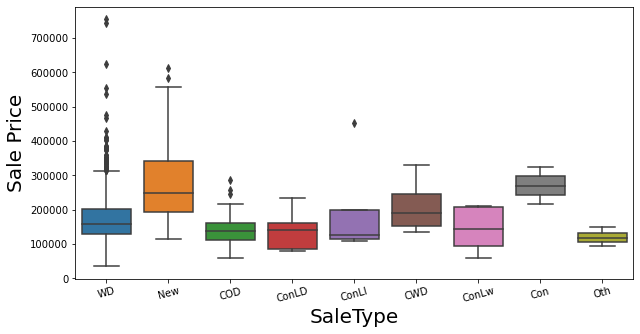

In [10]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: SaleType

feature_object = 'SaleType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleType     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(10,5))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for New (just constructed and sold) and Con (15% down payment) Type, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

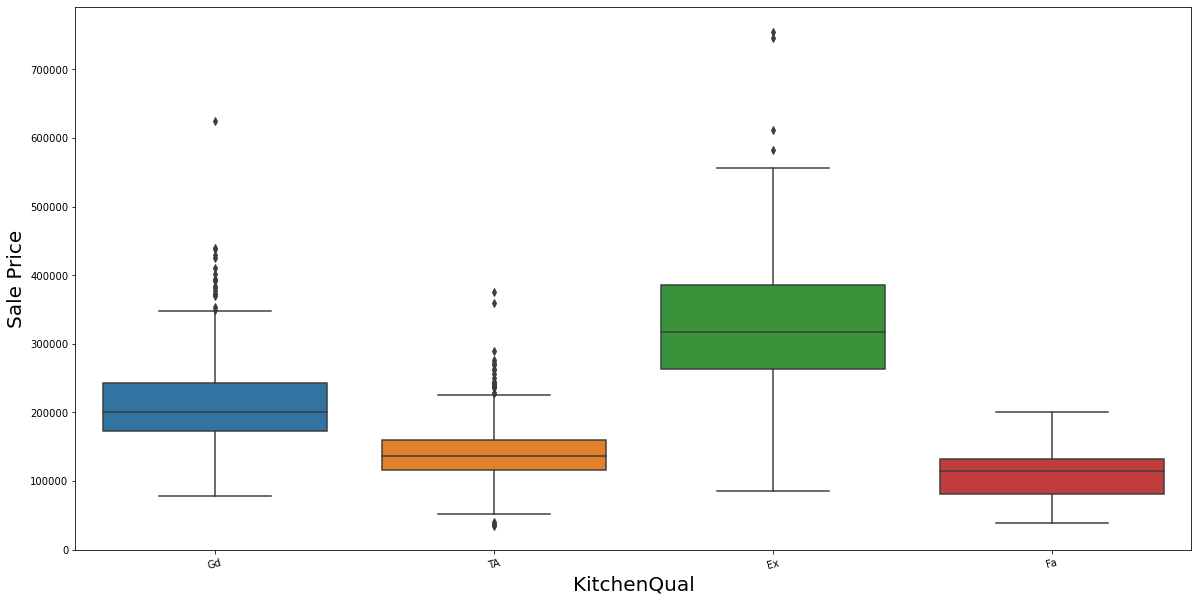

In [11]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: KitchenQual

feature_object = 'KitchenQual'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.KitchenQual     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for Ex (excellent) kitchen quality, the Sales Price is generally higher.

# Baseline Model(s)

**Comment**:
Using our domain knowledge, we believe the square footage of a house is most indicative of a house's sales price. We can see that the Ground Living Area (GrLivArea), Total Basement Area (TotalBsmtSF), and Garage Area (GarageArea) are 3 of the top 5 most correlated to the Sales Price in the plot above. Therefore, our baseline model will include these three features.

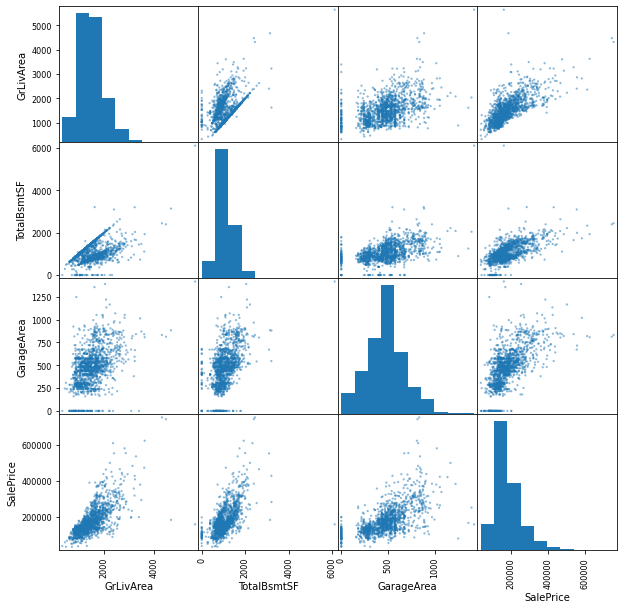

In [12]:
# Scatterplot matrix of baseline model features

baseline_features=['GrLivArea', 'TotalBsmtSF','GarageArea','SalePrice']
train_df_baseline=train_df_raw[baseline_features]
train_df_baseline.head()
ax = pd.plotting.scatter_matrix(train_df_baseline,
                                figsize=(10,10),
                                marker='o', s=5)
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

**Comment**:  
Scatterplot matrix shows trends indicating that sales price goes up when ground living area, basement area, and garage area goes up.

In [13]:
# Format Data for Modeling

#Standardize Data
scaler=StandardScaler()
train_df_std=pd.DataFrame(scaler.fit_transform(train_df_baseline))
X = train_df_std.iloc[:,:-1]
y = train_df_std.iloc[:,-1]
train_data_bl_std, dev_data_bl_std, train_labels_bl_std, dev_labels_bl_std = train_test_split(X,y, test_size=0.2) 
print("Standardized Train Data Shape:", train_data_bl_std.shape)
print("Standardized Dev Data Shape:", dev_data_bl_std.shape)

#Did not Standardize Data
X = train_df_baseline.iloc[:,:-1]
y = train_df_baseline.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  
print("UnStandardized Train Data Shape:", train_data_bl.shape)
print("UnStandardized Dev Data Shape:", dev_data_bl.shape)

Standardized Train Data Shape: (1168, 3)
Standardized Dev Data Shape: (292, 3)
UnStandardized Train Data Shape: (1168, 3)
UnStandardized Dev Data Shape: (292, 3)


**Comment**:
We started work with non-standardized data because we were only comparing square footage features in our baseline. However, we will investigate standardized data further after this baseline model

Estimated function: y = -20418.29 + 67.47*x_1 + 46.55*x_2 + 104.50*x_3
R^2: 0.6439784556177048
Accuracy: 0.7251224998312179
Root Mean Squared Error: 43316.40702357577
Mean Squared Log Error: 0.04342640324889595


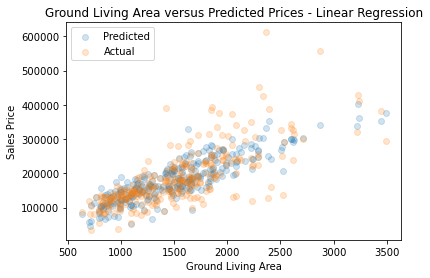

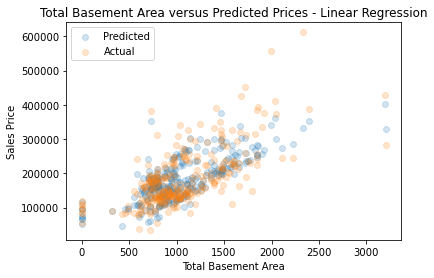

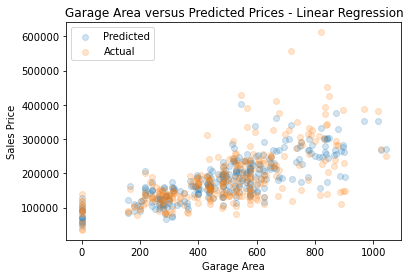

In [14]:
#Linear regression model without Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl, train_labels_bl)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl)    #predict
print("R^2:",lr.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels_bl, prediction))

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - Linear Regression')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
fig2=plt.scatter(dev_data_bl['GrLivArea'],prediction, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig3=plt.figure()
fig3=plt.title('Total Basement Area versus Predicted Prices - Linear Regression')
fig3=plt.xlabel('Total Basement Area')
fig3=plt.ylabel('Sales Price')
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],prediction, alpha=0.2)
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],dev_labels_bl, alpha=0.2)
fig3=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig4=plt.figure()
fig4=plt.title('Garage Area versus Predicted Prices - Linear Regression')
fig4=plt.xlabel('Garage Area')
fig4=plt.ylabel('Sales Price')
fig4=plt.scatter(dev_data_bl['GarageArea'],prediction, alpha=0.2)
fig4=plt.scatter(dev_data_bl['GarageArea'],dev_labels_bl, alpha=0.2)
fig4=plt.legend(['Predicted', 'Actual'],loc='upper left')

**Comment**:  
It appears that the linear regression model without standardized data performed the best in terms of accuracy.

In [15]:
#Linear regression model with Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl_std, train_labels_bl_std)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl_std)    #predict
print("R^2:",lr.score(train_data_bl_std,train_labels_bl_std))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl_std,dev_labels_bl_std))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl_std, prediction, squared=False))
#Cannot find mean squared log error because after standardizing, there are negative labels.

Estimated function: y = -0.00 + 0.47*x_1 + 0.33*x_2 + 0.27*x_3
R^2: 0.7114761818985047
Accuracy: 0.4654483981670771
Root Mean Squared Error: 0.7650666138128865


**Comment**:  
It appears that the linear regression model with standardized data performed worse but the RMSE is much lower.

In [16]:
#K-Nearest Neighbors Regressor Model

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train_data_bl, train_labels_bl)  
prediction = knn.predict(dev_data_bl)
print("R^2:",knn.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",knn.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels_bl, prediction))

R^2: 0.9983157512681696
Accuracy: 0.46937591961714936
Root Mean Squared Error: 60183.34290381989
Mean Squared Log Error: 0.0746144918950082


**Comment**:  
We wanted to try out k Neighbors to see its performance. It appears that the k neighbors regression model with non-standardized data had lower accuracy than linear regression.

In [17]:
#Gradient Boosting Regressor Model

train_data_bl = train_data_bl[['GrLivArea', 'TotalBsmtSF','GarageArea']]
dev_data_bl = dev_data_bl[['GrLivArea','TotalBsmtSF', 'GarageArea']]
gradbst = ensemble.GradientBoostingRegressor(n_estimators = 10, max_depth=5, min_samples_split=2, learning_rate=0.1,
                                            loss='ls')
gradbst.fit(train_data_bl, train_labels_bl)
prediction = gradbst.predict(dev_data_bl)
gradbst.score(dev_data_bl,dev_labels_bl)

print("R^2:",gradbst.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",gradbst.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels_bl, prediction))

R^2: 0.7330373829107583
Accuracy: 0.6643609973207428
Root Mean Squared Error: 47865.107719696854
Mean Squared Log Error: 0.06324040435809435


**Comment**:  
We wanted to try out gradient boosting regressor with nonstandardized data to also see its performance. It appears to have relatively high accuracy compared with linear regression and k-nearest neighbors regression.   


# Data Formatting

After EDA, we have determined several features that may be dropped due to large amounts of missing/NaN data. Other features with missing/NaN data will be converted to None or 0 value so that the feature may still be used in our model.  

Categorical data will be separated to ordinal and nominal. Ordinal data will be converted to integers that include the ordering of the data. Nominal data will be converted to dummy variables.  

Finally, we will standard scale all of the independent features while leaving the dependent feature (saleprice) alone.

In [18]:
# ORIGINAL DATA SIZE FOR REFERENCE
print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)

Train Shape: (1460, 81)
Test Shape: (1459, 80)


In [19]:
# DROPPING TOP 5 MOST MISSING/NAN FEATURES:
top_5_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_df_raw2 = train_df_raw.drop(top_5_missing,axis=1)
test_df_raw2 = test_df_raw.drop(top_5_missing,axis=1)
print("Train Data Dropped Top 5 Missing/NaN Columns Shape:", train_df_raw2.shape)
print("Test Data Dropped Top 5 Missing/NaN Columns Shape:", test_df_raw2.shape)

Train Data Dropped Top 5 Missing/NaN Columns Shape: (1460, 76)
Test Data Dropped Top 5 Missing/NaN Columns Shape: (1459, 75)


In [20]:
# CONVERTING NAN DATA TO 0 OR NONE

#Numerical Data to 0
numerical_NaN = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                 'GarageArea']
train_df_raw2[numerical_NaN]=train_df_raw2[numerical_NaN].fillna(0)
test_df_raw2[numerical_NaN]=test_df_raw2[numerical_NaN].fillna(0)

#Categorical Data to None
categorical_NaN = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType',
                   'SaleType','Electrical','GarageType','Functional','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'KitchenQual','GarageFinish','GarageQual','GarageCond']
train_df_raw2[categorical_NaN]=train_df_raw2[categorical_NaN].fillna('None')
test_df_raw2[categorical_NaN]=test_df_raw2[categorical_NaN].fillna('None')

# Check if it worked by checking Missingness
dftrain_missing = train_df_raw2.isnull().sum(axis=0)[train_df_raw2.isnull().sum(axis=0) != 0] # TRAINING DATA MISSINGNESS 
dftest_missing = test_df_raw2.isnull().sum(axis=0)[test_df_raw2.isnull().sum(axis=0) != 0] # TEST DATA MISSINGNESS
print("Number of train features (after replacing NaN data) with missing data:", len(dftrain_missing))
print("Number of test features (after replacing NaN data) with missing data:", len(dftest_missing))

Number of train features (after replacing NaN data) with missing data: 0
Number of test features (after replacing NaN data) with missing data: 0


In [21]:
# CONVERT ORDINAL DATA TO INTEGERS TO INCLUDE ORDERING OF DATA

# 1 is worst, largest number is best, use mapping
train_df_raw2['Functional']=train_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
train_df_raw2['BsmtQual']=train_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtCond']=train_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtExposure']=train_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType1']=train_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType2']=train_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['KitchenQual']=train_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train_df_raw2['GarageFinish']=train_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['GarageQual']=train_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['GarageCond']=train_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterQual']=train_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterCond']=train_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['LotShape']=train_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
train_df_raw2['LandSlope']=train_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
train_df_raw2['HeatingQC']=train_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['PavedDrive']=train_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})

test_df_raw2['Functional']=test_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
test_df_raw2['BsmtQual']=test_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtCond']=test_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtExposure']=test_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType1']=test_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType2']=test_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['KitchenQual']=test_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test_df_raw2['GarageFinish']=test_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['GarageQual']=test_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['GarageCond']=test_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterQual']=test_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterCond']=test_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['LotShape']=test_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
test_df_raw2['LandSlope']=test_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
test_df_raw2['HeatingQC']=test_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['PavedDrive']=test_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})


In [22]:
# CONVERT NOMINAL DATA TO DUMMIES

""" Running get_dummies on train and test data separately would not work because some training data could be
missing in test data and vice versa.  Therefore, we will combine all data and get_dummies. 
Reference: https://stackoverflow.com/questions/56738267/how-can-i-align-pandas-get-dummies-across-training-validation-testing 
"""
all_data = pd.concat([train_df_raw2, test_df_raw2]) 
all_data_dummy = pd.get_dummies(all_data)
print("all_data shape:", all_data_dummy.shape)

#We cannot split the data back to train, dev, and test yet, because standardizing features has the same issue

all_data shape: (2919, 223)


In [23]:
# MIN MAX SCALER THE DATA
from sklearn.preprocessing import MinMaxScaler

#First pull out SalePrice column since we won't be standard scaling the dependent feature
X=all_data_dummy.drop(['SalePrice'],axis=1)
Y=all_data_dummy['SalePrice']
print("Shape of all_data (dummies) X:", X.shape)
print("Shape of all_data (dummies) Y:", Y.shape)
#X.head(1)

#Scaling!
scaler=MinMaxScaler()
X_std=pd.DataFrame(scaler.fit_transform(X))      #only scaled independent features
print("Shape of standardized X:", X_std.shape)
#X_std.head(1)

#Add the Sale Price feature column back into all_data
all_data_std = X_std
all_data_std = all_data_std.assign(SalePrice = list(Y))  #adds SalePrice data back in
print("Shape of standardized X plus SalePrice column:", all_data_std.shape)

Shape of all_data (dummies) X: (2919, 222)
Shape of all_data (dummies) Y: (2919,)
Shape of standardized X: (2919, 222)
Shape of standardized X plus SalePrice column: (2919, 223)


In [24]:
X.head(1)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,4,3,7,5,2003,2003,...,0,0,0,1,0,0,0,0,1,0


In [25]:
X_std.head(1)

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,0.0,0.235294,0.207668,0.03342,1.0,1.0,0.666667,0.5,0.949275,0.883333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
all_data_std.head(1)

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,SalePrice
0,0.0,0.235294,0.207668,0.03342,1.0,1.0,0.666667,0.5,0.949275,0.883333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500.0


In [27]:
# SPLIT ALL_DATA TO TRAIN/TEST. THEN SPLIT TRAIN TO TEST/DEV.

# Split all_data to Train/Test
train_raw2, test_raw2 = train_test_split(all_data_std, test_size=1459/2919, shuffle=False)
test_raw2 = test_raw2.drop(['SalePrice'],axis=1)  #original test_data did not have SalePrice feature
print(train_raw2.shape)
print(test_raw2.shape)
test_data = test_raw2  #renaming test data

# Split Train data to Test/Dev
x = train_raw2.iloc[:,:-1]
y = train_raw2.iloc[:,-1]
train_data, dev_data, train_labels, dev_labels = train_test_split(x,y, test_size=0.2)  #20% dev, 80% test
print("Standardized Train Data Shape:", train_data.shape)
print("Standardized Dev Data Shape:", dev_data.shape)
print("Train Label Shape:", train_labels.shape)
print("Dev Label Shape:", dev_labels.shape)

(1460, 223)
(1459, 222)
Standardized Train Data Shape: (1168, 222)
Standardized Dev Data Shape: (292, 222)
Train Label Shape: (1168,)
Dev Label Shape: (292,)


In [28]:
# Replace the column names with original feature names from train data
for i in range(len(train_data.columns)):
    train_data = train_data.rename(columns={i: X.columns[i]})

for i in range(len(dev_data.columns)):
    dev_data = dev_data.rename(columns={i: X.columns[i]})

for i in range(len(test_data.columns)):
    test_data = test_data.rename(columns={i: X.columns[i]})

In [29]:
# SUMMARY OF DATA

# "train_data"    = Training Data
# "train_labels"  = Training Labels
# "dev_data"      = Development Data (to check accuracy of Machine Learning models)
# "dev_labels"    = Development Labels (to check accuracy of Machine Learning models)
# "test_data"     = Test Data (to predict housing price for submitting to Kaggle)


print("train_data:", train_data.shape)
print("train_labels:", train_labels.shape)
print("dev_data:", dev_data.shape)
print("dev_labels:", dev_labels.shape)
print("test_data",test_data.shape)

train_data: (1168, 222)
train_labels: (1168,)
dev_data: (292, 222)
dev_labels: (292,)
test_data (1459, 222)


# Linear Regression

# Decision Trees

# Neural Networks

Steps:  
1) Start with basic single layer neural network.  



2) Expand to multi-layer neural network.  

In [30]:
#Import Tensorflow Packages used for Neural Network
import tensorflow as tf
tf.__version__
%matplotlib inline
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
start_nn=time.time()   #calculate time it takes to run this section

#Generate some functions that will be used to analyze different neural network models

#Function to return a Plot and Mean-Squared-Log-Error 
def accuracies_nn(regressor=0, history=0, train_data=train_data, dev_data=dev_data, 
                  prediction=0, m=0, ylimit=0):
    
    #If there are negative predictions, end function
    neg = np.where(prediction[:,0]<0)
    if len(neg[0])>0:
        print("ERROR: Negative Price Prediction at indices:", neg) 
        return

    if m==1:
        regressor.summary()  #print summary if enabled    
    msle=mean_squared_log_error(dev_labels, prediction)
    print("Mean Squared Log Error:", msle)  #print MSLE
    
    #Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
    if ylimit == 0:
        ax1.set_ylim(msle/2, msle*2)   
    elif ylimit != 0:
        ax1.set_ylim(0,ylimit)       #allows to set some custom plotting limits
    ax1.set_title('Train vs Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Mean Squared Log Error')
    ax1.plot(history.history['msle'])
    ax1.plot(history.history['val_msle'])
    ax1.legend(['Train', 'Validation/Development'],loc='upper right') 
    
    ax2.set_title('Sale Prices (prediction & actual)')
    ax2.set_xlabel('Ground Living Area (sqft)')
    ax2.set_ylabel('Sales Price ($)')
    ax2.scatter(dev_data['GrLivArea'],prediction, alpha=0.2, color='red')
    ax2.scatter(dev_data['GrLivArea'],dev_labels, alpha=0.2, color='blue')
    ax2.legend(['Predicted', 'Actual'],loc='upper right')  

    ax3.set_title('Sale Prices (prediction & actual)')
    ax3.set_xlabel('Prediction ($)')
    ax3.set_ylabel('Actual ($)')
    ax3.scatter(prediction,dev_labels)
    ax3.plot(np.linspace(0,500000,1000),np.linspace(0,500000,1000))
    ax3.set_xlim(0,500000)
    ax3.set_ylim(0,500000)
    
#Function to predict the test data (data without labels):
def predict_test_nn(regressor):
    test_prediction = regressor.predict(test_data)
    for each in test_prediction:
        print(each[0])
    return test_prediction

## Start with Basic Single Layer Neural Network

In [31]:
#Function for Single Layer Neural Network with default parameters
def nn_single_layer(batch=1, epochs=10, act='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(1, input_dim=222))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    
    return model, history, prediction, train_time

#### Step 1 - Baseline Neural Network
Start with a few epochs and a small batch size to test algorithm. Use SGD optimizer and 'linear' activation.   
Result: MSLE was 36.4 at first try (pretty high), let's try larger epochs and smaller batches

Batch Size: 10, Epochs: 10, Training Time: 1.801
Optimizer: SGD, Activation: linear
Mean Squared Log Error: 55.186914637715354


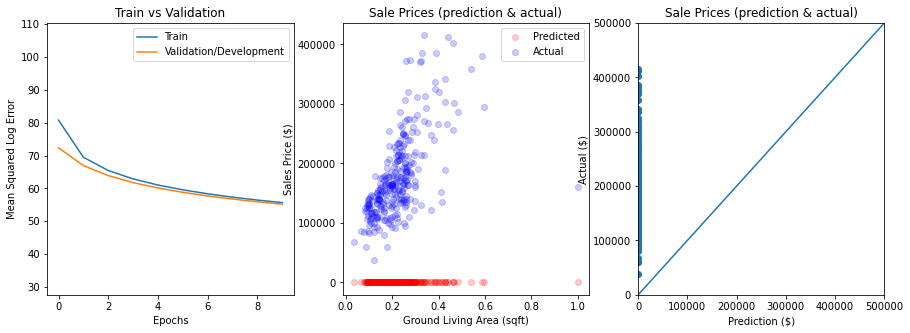

In [32]:
model,history,prediction,train_time = nn_single_layer(batch=10,epochs=10,verb=0)
accuracies_nn(model, history, train_data, dev_data, prediction, m=0)

#### Step 2 - Effect of Epochs and Batch Size

a) Set above code to:  1000 Epochs and 5 Batches.  
That is about 233 iterations/steps (1168 samples) per epoch or a total of 233,000 steps.  
Result: MSLE was 13.34 at first try (improved but still high). Training time was 194 seconds, quite long! 

b) Set above code to:  100 Epochs and 10 Batches.  
That is about 116 iterations/step (1168 samples) per epoch or a total of 11,600 steps.  
Result: MSLE was 24.7 at first try (better than baseline but worse than model with more steps). Training time was only 13 seconds. Using less steps allow quicker analysis when comparing optimiers and activation functions.  

Let's use 1, 10 batches and 5, 10 epochs to compare optimizers and activation functions.

#### Step 3 - Comparing Optimizers and Activation Functions

The cells below run batches of 1 and 10 with epochs of 5 and 10 while varying two optimizers and two activation functions.  Then plots a dataframe. 

Regarding Optimizers:  
In class we learned about SGD optimizers. On google, Adam was another recommended optimizer. Therefore, I wanted to compare the two. "Adam optimizer is a moment estimator but prefers flat minima in the error surface".  
Based on the results below, Adam optimizer always performs worse than SGD when using default learning rates. Finding the weights through backpropation may not lead to a lot of bouncing around or does not have a flat minima in the error surface.
SGD optimizer will be used for future models.  

Regarding Activation Functions:  
The table below shows that relu and linear activation performs similarly which make sense. relu is just an identity matrix and returns the same value or zero, whichever is greater. relu may actually be better to avoid any negative house price prediction.  Relu will be used.


In [33]:
# A function to store values of interest into a dictionary
def fill_in_comp(comp,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Activation'].append(Activation)
    comp['Optimizer'].append(Optimizer)
    comp['Learning_Rate'].append(Learning_Rate)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    return comp

In [34]:
# Initiate a dictionary for plotting differences later
comp={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Vary Batch and Epochs Constant
batches=[1, 10]
epochss=[5, 10]

for batch in batches:
    for epochs in epochss:

        # Activation: Linear / Optimizer: SGD    
        print("-"*90)
        act='linear'
        lr='default'
        opti=optimizers.SGD()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model,train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: Linear / Optimizer: Adam
        print("-"*90)
        act='linear'
        lr='default'
        opti=optimizers.Adam()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: relu / Optimizer: SGD
        print("-"*90)
        act='relu'
        lr='default'
        opti=optimizers.SGD()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: relu / Optimizer: Adam
        print("-"*90)
        act='relu'
        lr='default'
        opti=optimizers.Adam()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)
comp_df=pd.DataFrame(comp, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
comp_df

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.033
Optimizer: SGD, Activation: linear
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.933
Optimizer: Adam, Activation: linear
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.801
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.893
Optimizer: Adam, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 10, Training Time: 7.796
Optimizer: SGD, Activation: linear
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 10, Training Time: 7.7

,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE
0,1,5,linear,SGD,default,4.032897,44.578867
1,1,5,linear,Adam,default,3.933065,57.144325
2,1,5,relu,SGD,default,3.801363,44.575150
3,1,5,relu,Adam,default,3.893027,57.962501
4,1,10,linear,SGD,default,7.796189,40.368433
5,1,10,linear,Adam,default,7.733257,43.450861
6,1,10,relu,SGD,default,6.666259,40.370835
7,1,10,relu,Adam,default,8.492863,43.211000
8,10,5,linear,SGD,default,0.956709,60.147729
9,10,5,linear,Adam,default,1.006441,88.355395


#### Step 4 - Effect of Learning Rate  

Using SGD and Relu, we vary the learning rate of the optimizer, on only 5 epochs but 1 batch size.  This is 1168(samples) x 5 = 5840 steps. 

Results below showed that learning rate of 100 and 1000 produced decent MSLE for only 5 epochs. Note that sometimes, at different learning rates, MSLE would be really high (bad) which is possible for SGD because the descent could be bouncing too far and jump over the local minima. I assume this is more likely to happen when learning rate is high so we need to be careful.


In [35]:
# Initiate a dictionary for plotting differences later
comp2={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
batch=1
epochs=5
act='relu'
# Vary Learning Rate:
learnrates=[0.01, 0.1, 1, 10, 100, 1000, 10000]

for lr in learnrates:
    print("-"*90)
    opti=optimizers.SGD(learning_rate=lr)
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
    #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
    msle=mean_squared_log_error(dev_labels, prediction)
    comp2 = fill_in_comp(comp2,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

comp2_df=pd.DataFrame(comp2, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
comp2_df

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.221
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.720
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.758
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.879
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.234
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.690
Optimiz

,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE
0,1,5,relu,SGD,0.01,4.220711,44.574614
1,1,5,relu,SGD,0.10,3.720218,31.424156
2,1,5,relu,SGD,1.00,3.757580,20.547373
3,1,5,relu,SGD,10.00,3.878558,11.187462
4,1,5,relu,SGD,100.00,4.234143,1.102699
5,1,5,relu,SGD,1000.00,3.689968,1.608492
6,1,5,relu,SGD,10000.00,4.260861,12.311449


#### Step 5 - Effect of batch size  

Result below showed that the MSLE bounce really high randomly, probably because the learning rate is high. Regardless, it appears that training time decays exponentially. Batch size of 1 would take a long time, batch 10 would be much less time, but batch 20 wouldn't be that much less time. Using Elbow method on the plot of training time, select batch size 10 for speed since MSLE are still all pretty high and can be corrected with more epochs.

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.730
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 5, Epochs: 5, Training Time: 1.362
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 10, Epochs: 5, Training Time: 0.919
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 20, Epochs: 5, Training Time: 0.746
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 50, Epochs: 5, Training Time: 0.642
Optimizer: SGD, Activation: relu
------------------------------------------------------------------------------------------
Batch Size: 100, Epochs: 5, Training Time: 0.572
Op

,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE
0,1,5,relu,SGD,100,3.729502,3.103979
1,5,5,relu,SGD,100,1.362385,7.429176
2,10,5,relu,SGD,100,0.919039,5.550583
3,20,5,relu,SGD,100,0.746416,5.234720
4,50,5,relu,SGD,100,0.642006,1.836511
5,100,5,relu,SGD,100,0.571819,3.836284


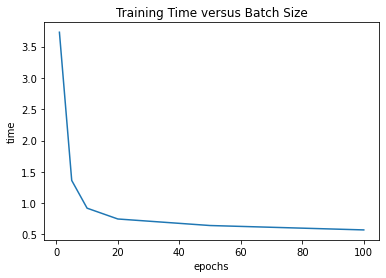

In [36]:
# Initiate a dictionary for plotting differences later
comp3={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
act='relu'
lr = 100
opti=optimizers.SGD(learning_rate=lr)
epochs=5

#Vary Batch size
batches = [1,5,10,20,50,100]

for batch in batches:
    print("-"*90)
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
    #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
    msle=mean_squared_log_error(dev_labels, prediction)
    comp3 = fill_in_comp(comp3,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

comp3_df=pd.DataFrame(comp3, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
plt.plot(comp3_df['Batch'], comp3_df['Train_Time'])
plt.title('Training Time versus Batch Size')
plt.xlabel('epochs')
plt.ylabel('time')
comp3_df

#### Step 6 - Training Time versus Epochs  
A quick model to predict the training time per epoch was done so that I know how long I can be away from the computer.  
Result: Training 10,000 epochs = can watch a netflix show.

Batch Size: 10, Epochs: 1, Training Time: 0.451
Optimizer: SGD, Activation: relu
Batch Size: 10, Epochs: 5, Training Time: 0.969
Optimizer: SGD, Activation: relu
Batch Size: 10, Epochs: 10, Training Time: 1.705
Optimizer: SGD, Activation: relu
Batch Size: 10, Epochs: 20, Training Time: 2.794
Optimizer: SGD, Activation: relu
Batch Size: 10, Epochs: 50, Training Time: 6.335
Optimizer: SGD, Activation: relu


,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE
0,100,1,relu,SGD,100,0.451233,5.44748
1,100,5,relu,SGD,100,0.969482,8.72455
2,100,10,relu,SGD,100,1.704873,3.56538
3,100,20,relu,SGD,100,2.793687,2.82321
4,100,50,relu,SGD,100,6.335355,2.16753
5,10 (PREDICTION),100,N/A,N/A,N/A,12.311622,N/A
6,10 (PREDICTION),1000,N/A,N/A,N/A,119.493098,N/A
7,10 (PREDICTION),2000,N/A,N/A,N/A,238.583628,N/A
8,10 (PREDICTION),3000,N/A,N/A,N/A,357.674157,N/A
9,10 (PREDICTION),5000,N/A,N/A,N/A,595.855216,N/A


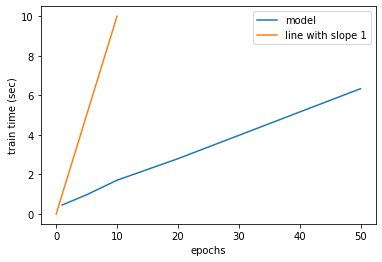

In [37]:
#Generate models by varying epochs. Wish to gather time for training
comp4={'Batch':[], 'Epochs':[], 'Activation':[], 'Optimizer':[], 'Learning_Rate':[], 'Train_Time':[],'MSLE':[]}  
epochss=[1,5,10,20,50]  
for epochs in epochss:  
    opti=optimizers.SGD(learning_rate=100)  
    model,history,prediction,train_time = nn_single_layer(batch=10, epochs=epochs, act='relu' , verb=0, opti=opti)  
    msle=mean_squared_log_error(dev_labels, prediction)  
    comp4 = fill_in_comp(comp4,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)  
comp4_df=pd.DataFrame(comp4, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])  

#plot training time versus epochs
plt.plot(comp4_df['Epochs'], comp4_df['Train_Time'])  
plt.plot(np.linspace(0,10), np.linspace(0,10))  
plt.xlabel('epochs')  
plt.ylabel('train time (sec)')  
plt.legend(['model', 'line with slope 1'])  

#Predict training time with linear regressiona and add to dataframe
lr = LinearRegression(fit_intercept=True) 
x=np.array(comp4['Epochs']).reshape(-1,1)  
y=np.array(comp4['Train_Time'])  
lr.fit(x,y)  
epoch_predict=[100,1000,2000,3000,5000,10000]  
prediction=lr.predict(np.array(epoch_predict).reshape(-1,1))  
for i in range(len(epoch_predict)):  
    new_row = {'Batch':'10 (PREDICTION)','Epochs':epoch_predict[i],'Activation':'N/A','Optimizer':'N/A',  
               'Learning_Rate':'N/A','Train_Time':prediction[i],'MSLE':'N/A'}   
    #append row to the dataframe  
    comp4_df = comp4_df.append(new_row, ignore_index=True)  
comp4_df

#### Step 7 - Running Models to Optimize MSLE

Now that we have some parameters, we can start running models with more epochs.  

Model 1:   
activation='relu', optimizer=SGD, learning rate=100 , batch=10  
5000 epochs returned an MSLE=0.525 which is high.  Took 600+ seconds too!  Script not provided, you'll have to trust me.
I believe the learning rate was too high or there was no momentum in optimizer for SGD. Adam may actually be better... as opposed to our findings before. But maybe we can increase number of steps by decreasing batch size.

Model 2:  
activation='relu', optimizer=SGD, learning rate=1000 , batch=1  
1000 epochs returned an MSLE=0.67 which is wosre.  Took 738 seconds.   
LR might still be too high and missing the local minima for the weights.

#### Theory: Run model with lower learning rate so we do not miss the local minima. Need to increase epochs to hopefully reach convergence. Run model with adam optimizer, maybe this momentum optimizer would help speed things up.

Model:  
Activation: relu / Optimizer: Adam / Learning Rate: 0.02 / Batch size = 1 / Epochs = 10000
(Learning Rate of 0.02 is 10x the default optimizer)

Result:  
Mean Squared Log Error: 0.02571031041571618   
Training Time: 8008.020   
__MSLE is really low, Success! Will submit to kaggle__   
Kaggle Score: 0.16546

Dissusion:  
While MSLE was low, the training time took very long.  Analyzing the training versus validation/development MSLE versus Epochs plot, we can see that the model starts overfitting after 2500epochs where training MSLE continues to decrease while the validation/development data MSLE stops decreasing.    

            
Script (not in a cell b/c it took 8000 seconds to run):  
```
model2,history2,prediction2,train_time2 = nn_single_layer(batch=1, epochs=10000, act='relu', verb=0,                                                                                 opti=optimizers.Adam(learning_rate=0.02))  
accuracies_nn(model2, train_data=train_data, dev_data=dev_data, prediction=prediction2, history=history2, m=0)  

#### Theory: To decrease training time, stop model when it starts to overfit. Per previous model, this was at 2500 epochs. 

Model:  
Activation: relu / Optimizer: Adam / Learning Rate: 0.02 / Batch size = 1 / Epochs = 2500
(Learning Rate of 0.02 is 10x the default optimizer)

Result:  
Mean Squared Log Error: 0.03914044220087549   
Training Time: 1866.401 
__MSLE is low still, will try a predict true test data and submit to kaggle as well__   
Kaggle score: 0.20330

Dissusion:  
Training time decreased by 6000 seconds. 
            
Script (not in a cell b/c it took 1866 seconds to run):  
```
model3,history3,prediction3,train_time3 = nn_single_layer(batch=1, epochs=2500, act='relu', verb=0,                                                                                   opti=optimizers.Adam(learning_rate=0.02))  
accuracies_nn(model3, train_data=train_data, dev_data=dev_data, prediction=prediction3, history=history3, m=0)  

## Multi-layer Neural Network - 2 layer

In [38]:
#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

# A function to store values into a dictionary
def fill_in_comp_2l(comp,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE,Hidden_Layer_Nodes):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Activation'].append(Activation)
    comp['Optimizer'].append(Optimizer)
    comp['Learning_Rate'].append(Learning_Rate)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    comp['Hidden_Layer_Nodes'].append(Hidden_Layer_Nodes)
    return comp

#### Step 1: Run a 2-layer NN with reasonable parameters

Based on previous analysis:
Use batch size 1 to update model often.  
Run for 100 epochs to hopefully see convergence.  
Select 5 hidden layer nodes b/c the features can be grouped in to 5 main categories: Type of neighborhood, Quality of house, Size of house, Type of house sale, and Appearance of house
Select relu for activation to avoid negative home prices. Although this hasn't happened.  
Select Adam optimizer to take advantage of momentum at each update step. Using a low learning rate would not jump over the local minima.  

Result: MSLE = 0.0251. 129 seconds training time. This is great because it already beat my single layer NN!  

Batch Size: 1, Epochs: 100, Training Time: 81.894
Optimizer: Adam, Activation: relu
Hidden Layer Features: 5
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 5)                 1115      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 6         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
Mean Squared Log Error: 0.02575788104790865


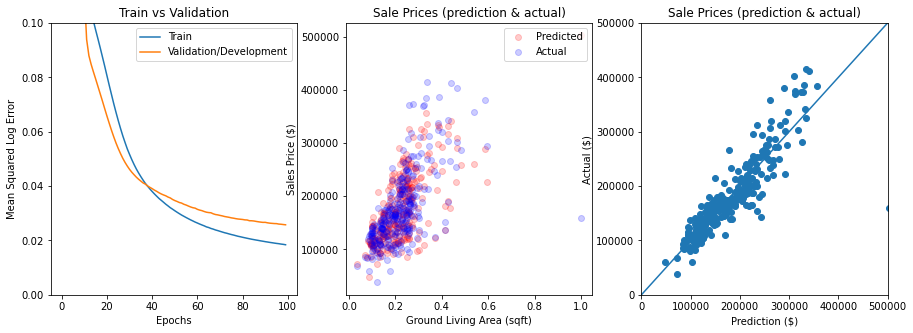

In [39]:
# Initiate a dictionary for plotting differences later
comp5={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Constant parameters
batch=1
epochs=100
hidden1_n=5
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

model_2l,history_2l,prediction_2l,train_time_2l = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
accuracies_nn(model_2l, history_2l, train_data, dev_data, prediction_2l, m=1, ylimit=0.1)
comp5 = fill_in_comp_2l(comp5,batch,epochs,act1,str(opti).split('.')[5].split(' ')[0],lr,train_time_2l,msle,hidden1_n)


#### But can we improve model??

__Theory__ : Because we have a sparse training data set, using a small(er) amount of hidden layer nodes than original number of features should lead to a better model because you would gather the most important variances from the large number of features.  

Therefore, model was ran with varying hidden layer nodes, both less than and more than number of features in training data.    
It is confirmed that at smaller hidden layer nodes, the MSLE was lower (a better model).  However, 10 and 20 hidden layer nodes performed better than 5 hidden layer nodes.  

What was interesting and not shown below is that when I tried using a smaller learning rate of 0.001 (instead of 0.01, it showed that higher nodes performed better (1000 nodes performed better than 5 nodes,etc...). This could be that the models with higher number nodes were reaching convergence faster than models with lower number of nodes. But overall, when convergence is reached, it is expected that higher number of nodes would overfit the model, as shown in the model below with a higher learning rate.

In [40]:
# Initiate a dictionary for plotting differences later
comp5={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Constant parameters
batch=1
epochs=100
hidden1_ns=[5,10,50,100,222,500,1000]
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

for hidden1_n in hidden1_ns:
    print("-"*90)
    model_2l2,history_2l2,prediction_2l2,train_time_2l2 = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
    prediction_2l2 = model_2l2.predict(dev_data)                 #predict
    #accuracies_nn(model_2l2, history_2l2, train_data, dev_data, prediction_2l2, m=0, ylimit=0)
    msle=mean_squared_log_error(dev_labels, prediction_2l2)
    comp5 = fill_in_comp_2l(comp5,batch,epochs,act1,str(opti).split('.')[5].split(' ')[0],lr,train_time_2l2,msle,hidden1_n)

comp5_df=pd.DataFrame(comp5, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate',
                                      'Train_Time','MSLE','Hidden_Layer_Nodes'])
comp5_df

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 83.152
Optimizer: Adam, Activation: relu
Hidden Layer Features: 5
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 80.136
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 86.240
Optimizer: Adam, Activation: relu
Hidden Layer Features: 50
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 82.172
Optimizer: Adam, Activation: relu
Hidden Layer Features: 100
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 92.793
Optimizer: Adam, Activation: relu
Hidden Layer Features

,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE,Hidden_Layer_Nodes
0,1,100,relu,Adam,0.01,83.152199,0.024337,5
1,1,100,relu,Adam,0.01,80.135658,0.023034,10
2,1,100,relu,Adam,0.01,86.239958,0.024636,50
3,1,100,relu,Adam,0.01,82.172137,0.024805,100
4,1,100,relu,Adam,0.01,92.793398,0.026198,222
5,1,100,relu,Adam,0.01,118.338619,0.028170,500
6,1,100,relu,Adam,0.01,152.929053,0.031699,1000


#### Confirming theory of less nodes improving the model

__Theory__ If less hidden layer nodes improve the model, less feature information may make model better. 

We will use "drop out" to set random features to 0 weights, essentially dropping out some nodes.

We will also separately run L1 regularization to see if removing the least important features will improve the model.  

If both actually improve model, we will combine them.  

Result:  
Dropout and L1 and L2 regularization did not improve the model.  This would mean that all features are important in helping predict the sales price of a home.  
Another result for L1 or L2 regularization. If applied on input layer, performed worse than L1 or L2 regularization on the hidden layer. It means that the information from the 222 input features were all important whereas the hidden layer, there may be some features that were not important. If applied on both layers, it performed worst.

Future models will not utilize dropout or regularization unless there appears to be overfitting.   

Batch Size: 1, Epochs: 100, Training Time: 79.817
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.023305944942506


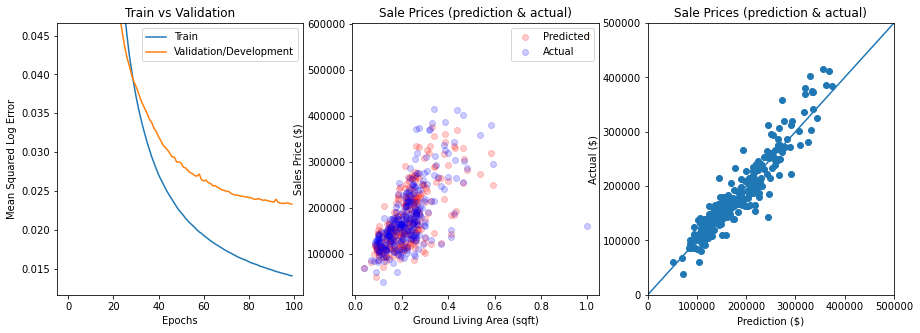

In [41]:
#Create new function for storing a new dataframe with interesting conditions.
def fill_in_comp_2l2(comp,Batch,Epochs,Dropout,L1Reg,L2Reg,Train_Time,MSLE,Hidden_Layer_Nodes):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Dropout'].append(Dropout)
    comp['L1Reg'].append(L1Reg)
    comp['L2Reg'].append(L2Reg)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    comp['Hidden_Layer_Nodes'].append(Hidden_Layer_Nodes)
    return comp

# Initiate a dictionary for plotting differences later
comp6={'Batch':[], 'Epochs':[], 'Dropout':[], 'L1Reg':[], 'L2Reg':[], 
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Base Model for comparing to models with dropout, L1 and L2 models. 

#Constant parameters for all of following models.
batch=1
epochs=100
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='No'

model_2lb,history_2lb,prediction_2lb,train_time_2lb = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti) #train model
accuracies_nn(model_2lb, history_2lb, train_data, dev_data, prediction_2lb, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2lb)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg,L2Reg,train_time_2lb,msle,hidden1_n)

Batch Size: 1, Epochs: 100, Training Time: 80.831
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.04130750895117873


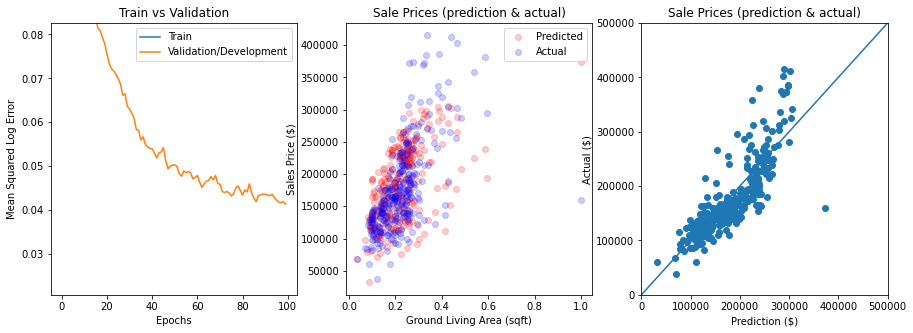

In [42]:
def nn_two_layer_dropout(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                         verb=0, opti=optimizers.SGD(), dropout=dropout): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

#Varying parameters for each model
dropout=0.5
L1Reg='No'
L2Reg='No'

model_2ld,history_2ld,prediction_2ld,train_time_2ld = nn_two_layer_dropout(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti, dropout)
accuracies_nn(model_2ld, history_2ld, train_data, dev_data, prediction_2ld, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ld)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 79.781
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.13976192496276557
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 74.374
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.0673731255912558
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 76.398
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.37080571058768363


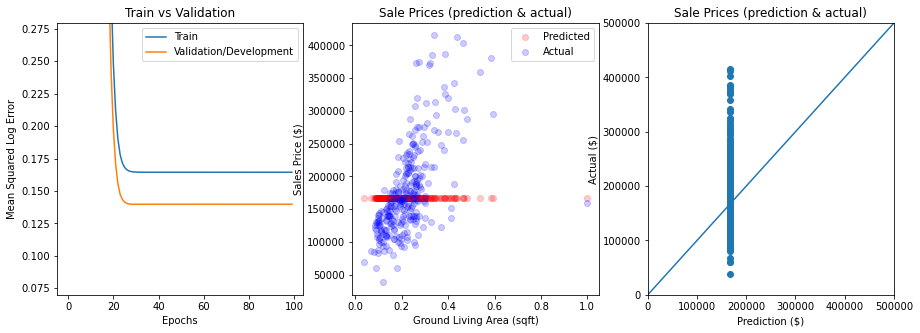

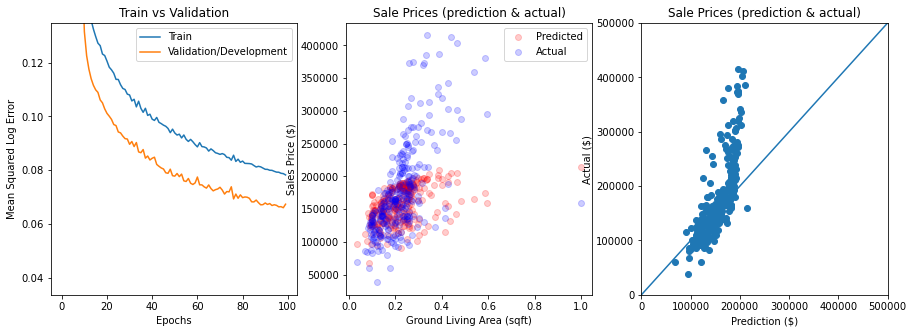

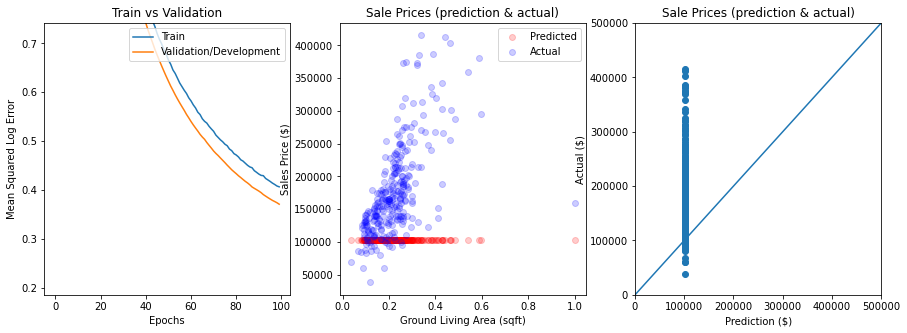

In [43]:
def nn_two_layer_l1reg(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                       verb=0, opti=optimizers.SGD(), order=0): 
    
    if order == '1st Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(1, activation = act2))
    if order == '2nd Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l1(0.01)))
    if order == 'Both Layers':      
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l1(0.01)))
        
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

#Varying parameters for each model
dropout='No'
L1Reg='1st Layer'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='2nd Layer'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='Both Layers'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 82.317
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.1396424900159199
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 80.672
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.0929075789428882
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 78.856
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 2.8381020838277573


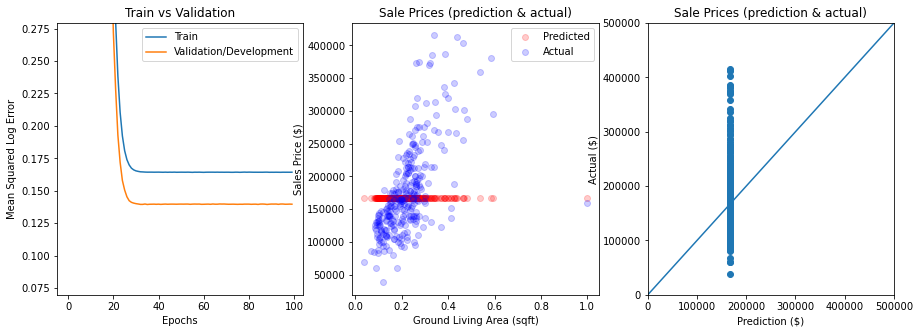

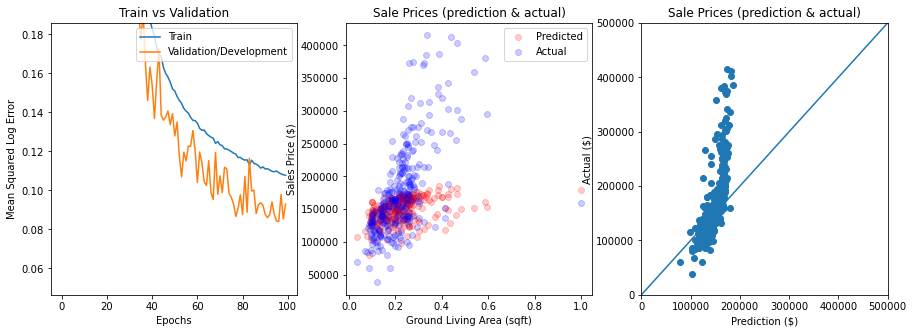

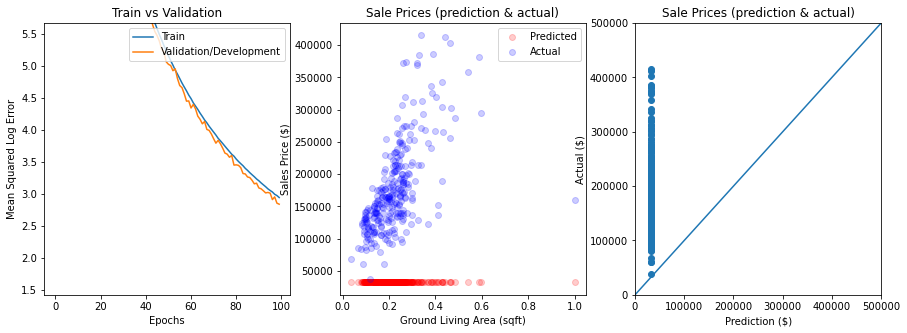

In [44]:
def nn_two_layer_l2reg(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                       verb=0, opti=optimizers.SGD(), order=0): 
    
    if order == '1st Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(1, activation = act2))
    if order == '2nd Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l2(0.01)))
    if order == 'Both Layers':      
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l2(0.01)))
        
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='1st Layer'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='2nd Layer'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='Both Layers'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

In [45]:
comp6_df=pd.DataFrame(comp6, columns=['Batch','Epochs','Dropout','L1Reg','L2Reg',
                                      'Train_Time','MSLE','Hidden_Layer_Nodes'])
comp6_df

,Batch,Epochs,Dropout,L1Reg,L2Reg,Train_Time,MSLE,Hidden_Layer_Nodes
0,1,100,No,No,No,79.817230,0.023306,10
1,1,100,0.5,No,No,80.830808,0.041308,10
2,1,100,No,1st Layer,No,80.830808,0.139762,10
3,1,100,No,2nd Layer,No,80.830808,0.067373,10
4,1,100,No,Both Layers,No,80.830808,0.370806,10
5,1,100,No,No,1st Layer,82.316639,0.139642,10
6,1,100,No,No,2nd Layer,80.672339,0.092908,10
7,1,100,No,No,Both Layers,78.855571,2.838102,10


#### Final 2 layer neural network

From this analysis, the final 2-layer neural network will have the following parameters:
10 hidden layer nodes. Without Dropout or regularization.  
Low learning rate so that we can slow down the gradient descent and not jump over local minimas.  
Batch:1, Epochs:100 

Batch Size: 1, Epochs: 100, Training Time: 79.739
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.02311500475060217


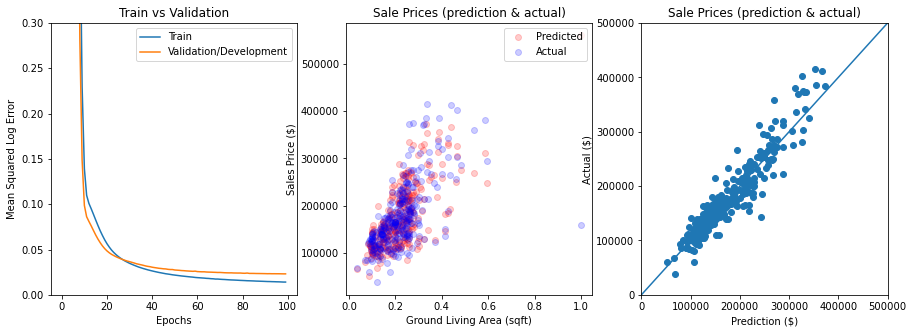

In [46]:
batch=1
epochs=100
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


final_2l_model,final_2l_history,final_2l_prediction,final_2l_train_time = nn_two_layer(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti)
accuracies_nn(final_2l_model, final_2l_history, train_data, dev_data, final_2l_prediction, m=0, ylimit=0.3)


## Multi-layer Neural Network - 3 layer

Would a 3-layer neural network imrpove?  Take lessons from previous analysis but apply it for a 3-layer.

Lessons learned before:  
1) Use 10 hidden nodes in 1st hidden layer  
2) Do not use dropout, l1 or l2 regularization
3) use learning rate of 0.01 with adam optimizer and relu activation function
4) use 1 or 10 batches for 100 epochs.

Batch Size: 1, Epochs: 100, Training Time: 86.320
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.028036995196573322


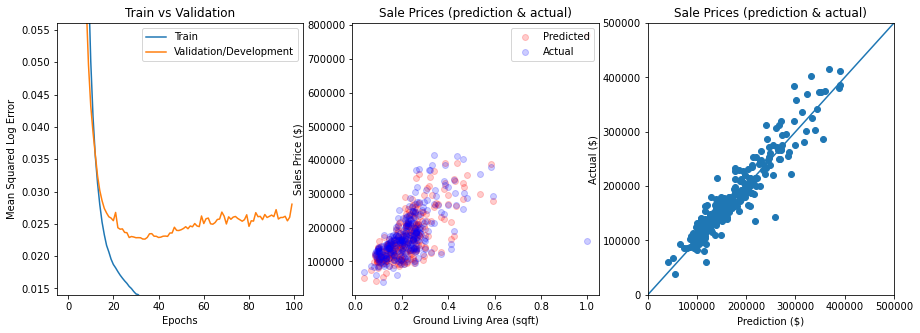

In [50]:
batch=1
epochs=100
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Function for Three Layer Neural Network with default parameters
def nn_three_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, 
                   act1='linear', act2='linear', act3='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(hidden2_n, activation =act2))
    model.add(Dense(1, activation =act3))   
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


model_3l,history_3l,prediction_3l,train_time_3l = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, 
                                                                           act1, act2, act3, 0, opti)
accuracies_nn(model_3l, history_3l, train_data, dev_data, prediction_3l, m=0, ylimit=0)


**COMMENT:**  There seems to be overfitting.  Let's use dropouts and regularizations.  

Result: running dropouts and l1 regularization separately and combined, all did not help fix the overfitting.  Best model still appears to be no dropout and regularization.

Batch Size: 1, Epochs: 100, Training Time: 79.748
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.14415267238813234


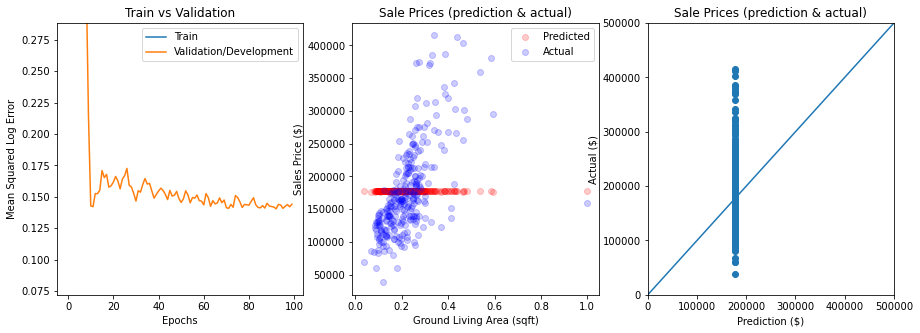

In [48]:
batch=1
epochs=100
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)
dropout=0.5


#Function for Three Layer Neural Network with default parameters
def nn_three_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, 
                   act1='linear', act2='linear', act3='linear', verb=0, opti=optimizers.SGD(), dropout=0.5): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(dropout))
    model.add(Dense(hidden2_n, activation =act2))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation =act3))   
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


model_3ld,history_3ld,prediction_3ld,train_time_3ld = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, 
                                                                           act1, act2, act3, 0, opti)
accuracies_nn(model_3ld, history_3ld, train_data, dev_data, prediction_3ld, m=0, ylimit=0)


In [49]:
end_nn = time.time()
print("time to run NN section:", end_nn - start_nn)

time to run NN section: 1771.3079097270966
